In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"Data\german.data-numeric", delim_whitespace=True, header=None)


C:\Users\thaip\AppData\Local\Temp\ipykernel_11116\2001957796.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(r"Data\german.data-numeric", delim_whitespace=True, header=None)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [4]:
import pandas as pd

new_columns = [f"A{i}" for i in range(1, 25)] + ["label"]
df.columns = new_columns

df.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A16,A17,A18,A19,A20,A21,A22,A23,A24,label
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [5]:
df.shape

(1000, 25)

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [8]:
X = df.drop(columns = ["label"])
y = df["label"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,4
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_pred = rf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           1       0.82      0.86      0.84       141
           2       0.62      0.56      0.59        59

    accuracy                           0.77       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.76      0.77      0.77       200

Confusion matrix:
 [[121  20]
 [ 26  33]]


In [12]:
rf_grid = RandomForestClassifier(
    bootstrap=True,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [4,5,6],
    'min_samples_split': [4, 6, 8],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  #
    scoring='accuracy',   
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 300}
Best CV Score: 0.7350000000000001


In [13]:
best_params = grid_search.best_params_

best_rf_1 = RandomForestClassifier(
    **best_params,               
    bootstrap=True,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

best_rf_1.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,5
,min_samples_split,4
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = best_rf_1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.765
Report:
               precision    recall  f1-score   support

           1       0.87      0.78      0.82       141
           2       0.58      0.73      0.65        59

    accuracy                           0.77       200
   macro avg       0.73      0.75      0.74       200
weighted avg       0.79      0.77      0.77       200



In [15]:
print("Confusion matrix:", confusion_matrix(y_test, y_pred))

Confusion matrix: [[110  31]
 [ 16  43]]


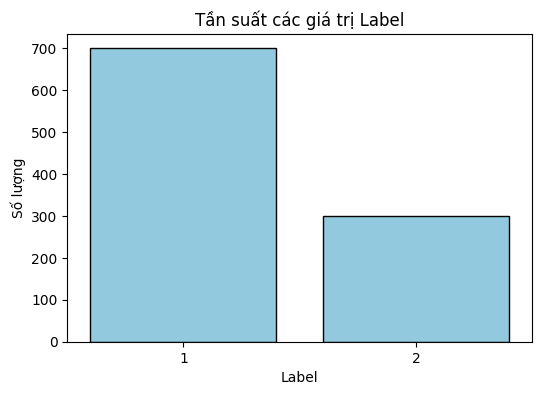

In [16]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df, color="skyblue", edgecolor="black")
plt.title("Tần suất các giá trị Label")
plt.xlabel("Label")
plt.ylabel("Số lượng")
plt.show()

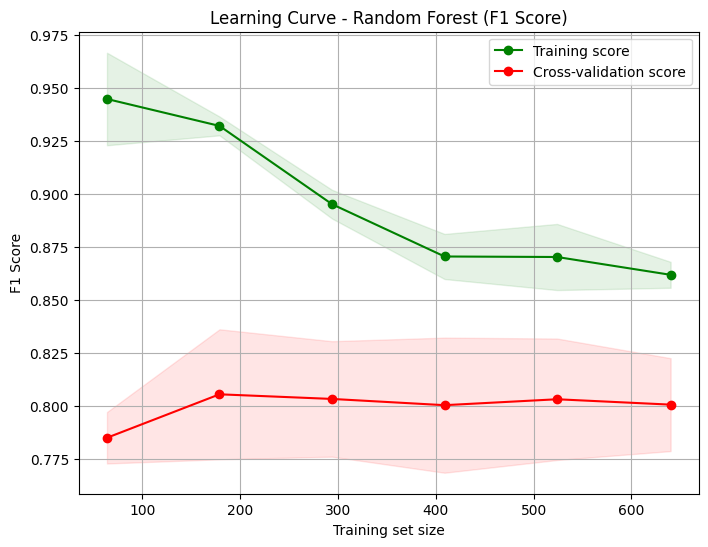

In [17]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring="f1"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 6),
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve - Random Forest (F1 Score)")
    plt.xlabel("Training set size")
    plt.ylabel("F1 Score")
    plt.grid(True)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                     alpha=0.1, color="g")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                     alpha=0.1, color="r")
    plt.plot(train_sizes, train_mean, 'o-', color="g", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="r", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# 🚀 Gọi hàm
plot_learning_curve(best_rf_1, X_train, y_train, cv=5, scoring="f1")

In [18]:
import numpy as np
import pandas as pd

importances = best_rf_1.feature_importances_
res = list(df.drop(columns = ["label"]).columns)  

def n_best(importances, feature_names, top_n=10, ascending=False):
    df_imp = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    df_sorted = df_imp.sort_values(by='Importance', ascending=ascending).reset_index(drop=True)

    print(df_sorted.head(top_n))

    return df_sorted.head(top_n)
    

In [19]:
top_features = n_best(importances, res, top_n=10)


  Feature  Importance
0      A1    0.227995
1      A3    0.104323
2      A4    0.102904
3      A2    0.101090
4     A10    0.093206
5      A5    0.061016
6      A6    0.046637
7      A9    0.043019
8     A21    0.031584
9     A11    0.028760


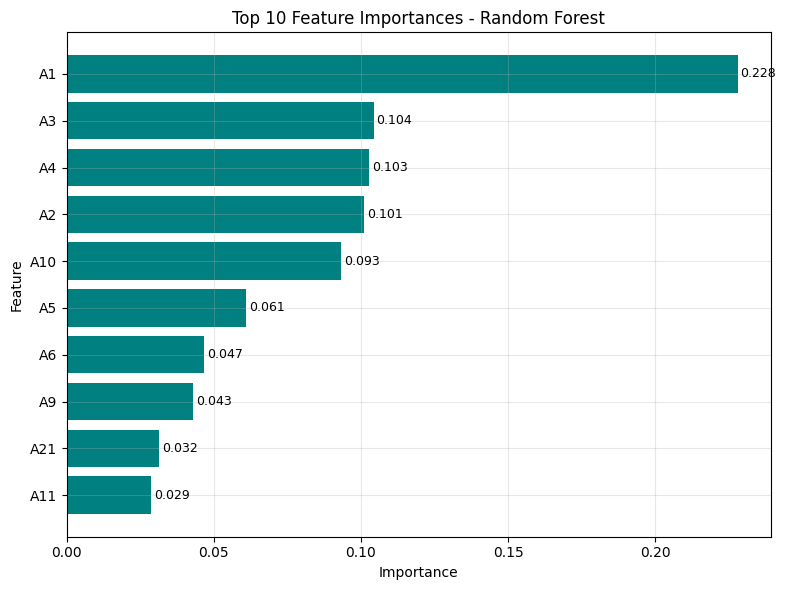

In [20]:
plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='teal')
plt.gca().invert_yaxis()  
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")

for i, v in enumerate(top_features['Importance']):
    plt.text(v + 0.001 , i, f"{v:.3f}", va='center', fontsize=9)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [21]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, threshold=0.01, prefit=True)
X_reduced = selector.transform(X)
print("Số feature còn lại:", X_reduced.shape[1])


Số feature còn lại: 21


C:\Users\thaip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [22]:
X_reduced

array([[ 1,  6,  4, ...,  1,  0,  1],
       [ 2, 48,  2, ...,  1,  0,  1],
       [ 4, 12,  4, ...,  1,  1,  0],
       ...,
       [ 4, 12,  2, ...,  1,  0,  1],
       [ 1, 45,  2, ...,  0,  0,  1],
       [ 2, 45,  4, ...,  1,  0,  1]], dtype=int64)

In [23]:
from sklearn.feature_selection import SelectFromModel
import pandas as pd


selector = SelectFromModel(best_rf_1, threshold=0.01, prefit=True)
mask = selector.get_support()
selected_features = X.columns[mask]
removed_features = X.columns[~mask]

print(removed_features.tolist())



['A12', 'A13', 'A15', 'A18', 'A19', 'A22', 'A23', 'A24']


In [24]:
top_features = n_best(importances, res, top_n=10)


  Feature  Importance
0      A1    0.227995
1      A3    0.104323
2      A4    0.102904
3      A2    0.101090
4     A10    0.093206
5      A5    0.061016
6      A6    0.046637
7      A9    0.043019
8     A21    0.031584
9     A11    0.028760


In [25]:
X_2 = df.drop(columns = removed_features.tolist())
X_2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A14,A16,A17,A20,A21,label
0,1,6,4,12,5,5,3,4,1,67,3,2,0,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,0,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,3,1,0,0,0,1,1
3,1,42,2,79,1,4,3,4,2,45,3,1,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,3,1,1,0,0,0,2


In [26]:
X_new = X_2.drop(columns = ["label"])
y = df["label"]

In [27]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [28]:
best_rf_2 = RandomForestClassifier(
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=4,
    n_estimators=300,
    bootstrap=True,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

best_rf_2.fit(X_train_2, y_train_2)

,n_estimators,300
,criterion,'gini'
,max_depth,5
,min_samples_split,4
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
y_pred_2 = best_rf_2.predict(X_test_2)
print("Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Report:\n", classification_report(y_test_2, y_pred_2))


Accuracy: 0.755
Report:
               precision    recall  f1-score   support

           1       0.87      0.77      0.82       141
           2       0.57      0.73      0.64        59

    accuracy                           0.76       200
   macro avg       0.72      0.75      0.73       200
weighted avg       0.78      0.76      0.76       200



In [30]:
from collections import Counter

print(Counter(y_train))

Counter({1: 559, 2: 241})


In [33]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
pipe_under = Pipeline(steps=[
    ('under', RandomUnderSampler(random_state=42)),  # giảm lớp 1 trước khi train
    ('rf', RandomForestClassifier(
        max_depth=5,
        max_features='sqrt',
        min_samples_leaf=4,
        min_samples_split=4,
        n_estimators=300,
        bootstrap=True,
        class_weight=None,   
        n_jobs=-1,
        random_state=42
    ))
])

pipe_under.fit(X_train, y_train)

y_pred_under = pipe_under.predict(X_test)

print("🔹 RandomForest with undersampling:")
print(classification_report(y_test, y_pred_under, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_under))

🔹 RandomForest with undersampling:
              precision    recall  f1-score   support

           1      0.906     0.681     0.777       141
           2      0.521     0.831     0.641        59

    accuracy                          0.725       200
   macro avg      0.713     0.756     0.709       200
weighted avg      0.792     0.725     0.737       200

Confusion matrix:
 [[96 45]
 [10 49]]


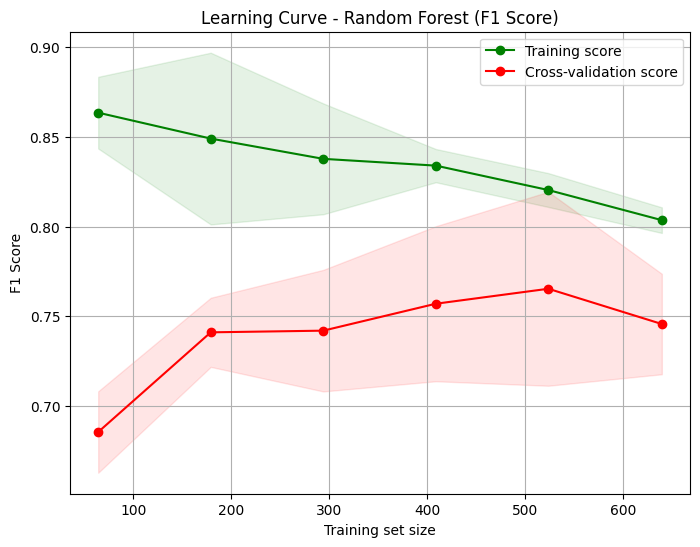

In [34]:
plot_learning_curve(pipe_under, X_train, y_train, cv=5, scoring="f1")

In [75]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTETomek


pipe_smote = Pipeline(steps=[
    ('smote', SMOTE(sampling_strategy=0.9, random_state=42)),  
    ('rf', RandomForestClassifier(
        max_depth=20,
        max_features='sqrt',
        min_samples_leaf=2,
        min_samples_split=4,
        n_estimators=500,
        bootstrap=True,
        class_weight=None,  
        n_jobs=-1,
        random_state=42
    ))
])

pipe_smote.fit(X_train, y_train)
y_pred_smote = pipe_smote.predict(X_test)

print("🔹 RandomForest with SMOTE oversampling:")
print(classification_report(y_test, y_pred_smote, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_smote))


🔹 RandomForest with SMOTE oversampling:
              precision    recall  f1-score   support

           1      0.832     0.879     0.855       141
           2      0.667     0.576     0.618        59

    accuracy                          0.790       200
   macro avg      0.749     0.728     0.737       200
weighted avg      0.783     0.790     0.785       200

Confusion matrix:
 [[124  17]
 [ 25  34]]


In [77]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np

pipe = Pipeline([
    ("under", RandomUnderSampler(sampling_strategy=0.8, random_state=42)),  # giảm nhẹ lớp 1
    ("rf", RandomForestClassifier(
        bootstrap=True,
        class_weight=None,          
        
        n_jobs=-1,
        random_state=42
    ))
])

param_grid = {
    "rf__n_estimators": [300, 400, 500],
    "rf__max_depth": [6, 8, 10],
    "rf__min_samples_split": [2, 4],
    "rf__min_samples_leaf": [2, 3],
    "rf__max_features": ["sqrt", "log2"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_macro",     
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV f1_macro:", round(grid.best_score_, 3))


best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\n🔹 RandomForest with undersampling:")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params: {'rf__max_depth': 8, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 500}
Best CV f1_macro: 0.709

🔹 RandomForest with undersampling:
              precision    recall  f1-score   support

           1      0.884     0.809     0.844       141
           2      0.620     0.746     0.677        59

    accuracy                          0.790       200
   macro avg      0.752     0.777     0.761       200
weighted avg      0.806     0.790     0.795       200

Confusion matrix:
 [[114  27]
 [ 15  44]]


In [78]:
import joblib

best_model = grid.best_estimator_
joblib.dump(best_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

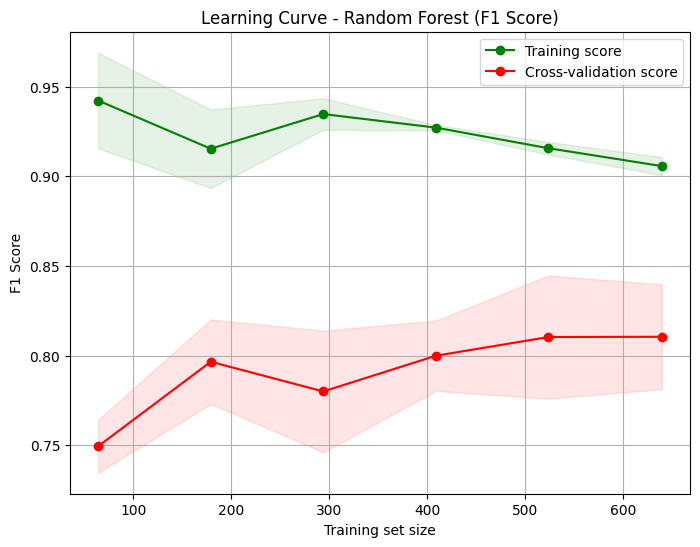

In [81]:
plot_learning_curve(best_model, X_train, y_train, cv=5, scoring="f1")